In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import yfinance as yf

In [4]:
#Using TCS stock data from Yahoo Finance
ticker = 'TCS.NS' 
start_date = '2018-01-01'
end_date = '2024-12-31'

data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2018-01-01,1183.321411,1205.327517,1178.580210,1199.736529,1351760
2018-01-02,1176.880615,1194.056196,1171.960546,1189.762274,1920290
2018-01-03,1180.212646,1193.787607,1176.880440,1177.238285,1257120
2018-01-04,1188.464844,1190.656467,1180.816331,1185.289120,913082
2018-01-05,1202.822510,1207.429505,1185.289197,1185.289197,1153706


Price   Ticker
Close   TCS.NS    0
High    TCS.NS    0
Low     TCS.NS    0
Open    TCS.NS    0
Volume  TCS.NS    0
dtype: int64


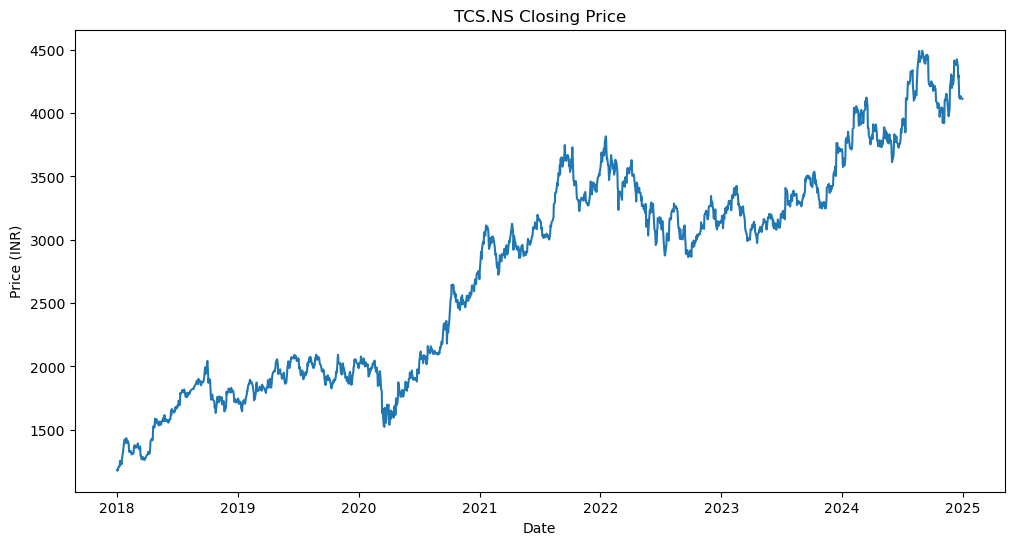

In [6]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Plot the closing price
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.show()

In [8]:
# Use previous day's prices to predict next day's price

data['Previous_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)

X = data[['Previous_Close']]
y = data['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2404.92
R-squared: 0.98


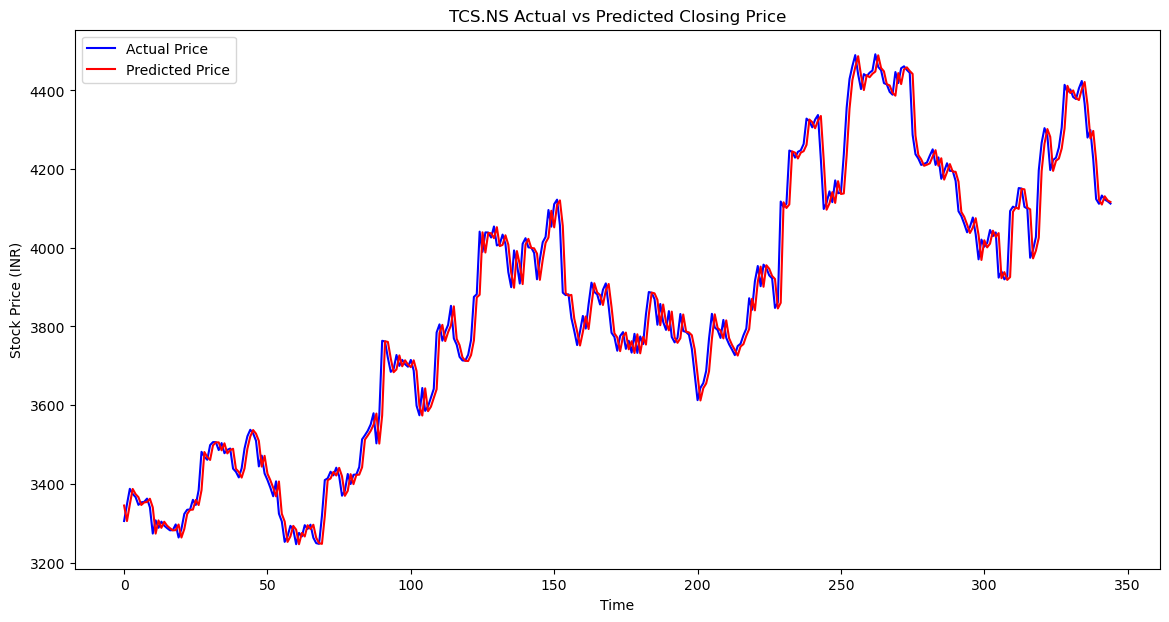

In [12]:
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title(f'{ticker} Actual vs Predicted Closing Price')
plt.xlabel('Time')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.show()